<a href="https://colab.research.google.com/github/SkAmeen18/SIM_Lab/blob/main/Sim_Lab_6_1077.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [9]:
data1 = np.array([18.4, 19.1, 17.9, 18.7, 18.3])
data2 = np.array([20.2, 20.5, 20.1, 20.3, 20.4])

In [10]:
t_statistic, p_value = stats.ttest_ind(data1, data2, equal_var=True)

In [11]:
# mean difference
mean_diff = np.mean(data1) - np.mean(data2)

# sample sizes
n1, n2 = len(data1), len(data2)

# sample variances
s1_sq, s2_sq = np.var(data1, ddof=1), np.var(data2, ddof=1)

# pooled variance
sp_sq = ((n1 - 1) * s1_sq + (n2 - 1) * s2_sq) / (n1 + n2 - 2)

# standard error using pooled variance
std_err = np.sqrt(sp_sq * (1/n1 + 1/n2))

# degrees of freedom
df = n1 + n2 - 2

# 95% confidence interval
ci = stats.t.interval(0.95, df, loc=mean_diff, scale=std_err)

In [12]:
# Task 1: State hypotheses and variance assumption
print("Null Hypothesis (H0): μ1 = μ2")
print("Alternative Hypothesis (H1): μ1 ≠ μ2")
print("Variance assumption: Equal variances assumed (small samples, no evidence of heteroscedasticity)")
print()

Null Hypothesis (H0): μ1 = μ2
Alternative Hypothesis (H1): μ1 ≠ μ2
Variance assumption: Equal variances assumed (small samples, no evidence of heteroscedasticity)



In [14]:
# task 2: Compute sample statistics
mean1, mean2 = np.mean(data1), np.mean(data2)
var1, var2 = np.var(data1, ddof=1), np.var(data2, ddof=1)
mean_diff = mean1 - mean2

print("=== Sample Statistics ===")
print(f"Sample 1 Mean = {mean1:.2f}")
print(f"Sample 2 Mean = {mean2:.2f}")
print(f"Sample 1 Variance = {var1:.2f}")
print(f"Sample 2 Variance = {var2:.2f}")
print(f"Mean Difference = {mean_diff:.2f}\n")

=== Sample Statistics ===
Sample 1 Mean = 18.48
Sample 2 Mean = 20.30
Sample 1 Variance = 0.20
Sample 2 Variance = 0.02
Mean Difference = -1.82



In [15]:
# Task 3: Perform Welch's t-test (unequal variances)
t_stat, p_value = stats.ttest_ind(data1, data2, equal_var=False)

In [17]:
# Task 4: Degrees of freedom (Welch’s formula)
n1, n2 = len(data1), len(data2)
se1, se2 = var1/n1, var2/n2
df = (se1 + se2)**2 / ((se1**2)/(n1-1) + (se2**2)/(n2-1))

print("=== Hypothesis Test Results ===")
print(f"t-Statistic = {t_stat:.2f}")
print(f"Degrees of Freedom = {df:.2f}")
print(f"p-Value = {p_value:.4f}\n")

=== Hypothesis Test Results ===
t-Statistic = -8.54
Degrees of Freedom = 4.98
p-Value = 0.0004



Reject H0. There is significant evidence that the population means differ.


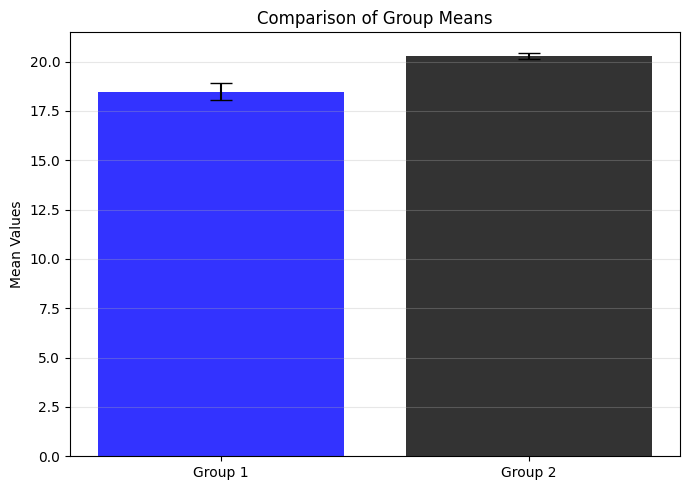

In [21]:
# Task 5: Make statistical decision
significance_level = 0.05
if p_value < significance_level:
    decision = "Reject H0. There is significant evidence that the population means differ."
else:
    decision = "Fail to reject H0. There is insufficient evidence that the population means differ."

print(decision)

# Create visualization
fig, ax = plt.subplots(figsize=(7, 5))
group_names = ['Group 1', 'Group 2']
means = [mean1, mean2]
std_devs = [np.std(data1, ddof=1), np.std(data2, ddof=1)]

bars = ax.bar(group_names, means, color=['blue', 'black'], alpha=0.8)
ax.errorbar(group_names, means, yerr=std_devs, fmt='none', color='black', capsize=8)
ax.set_ylabel('Mean Values')
ax.set_title('Comparison of Group Means')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()